# Identificación del riesgo de inundación por desbordamiento en Bogotá 
### Objetivo: realizar la limpieza de información, dejando solo información de población y pobreza para la zona urbana de la ciudad y delimitando las cuencas a tratar. 
#### Fuentes de información: Cuerpos de agua (IDECA), Población e Índice de Pobreza Multidimensional a nivel de manzana del Censo de Población y Vivienda de 2018 (DANE)

In [1]:
# Importar librerías 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
from pathlib import Path
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar

## Parte 1: Cuerpos de agua de Bogotá 

Se establece la ruta en donde se encuentra la carpeta con los datos a usar, en el presente notebook, se limpiarán los datos correspondientes a los cuerpos de agua de Bogotá, 
y también se usará como referencia una capa de localidades de la cuidad de Bogotá. Esta carpeta de los datos se encuentra afuera de Github, esto por temas de almacenamiento.
También se fija la carpeta en la cual se desea se guarden los mapas generados, esta carpeta si hace parte del repositorio de Github.


In [32]:
#se carga el archivo de cuerpos de agua de Bogotá, con el fin de extraer el río Bogotá, se fija la ruta en donde estan los datos

root_folder=r"/notebooks/trabajo_final/datos"# ruta de los datos
ruta_mapa=r"/notebooks/Riesgo_Inundacion_BOG/results/maps"# ruta en la cual se van a guardar los mapas


#Se cargan archivo .shp de cuerpos de agua 

shp_path=root_folder+r"/CuerpoAgua.shp"
c_agua= gpd.read_file(shp_path)


print("CRS c_agua:", c_agua.crs)   # se verifica el CRS en el cual esta el geodataframe (cuerpos de agua)           


#Se cargan archivo .shp de localidades de Bogotá

shp_path=root_folder+r"/poligonos-localidades.shp"
localidades= gpd.read_file(shp_path)


print("CRS localidades:", localidades.crs)   # se verifica el CRS en el cual esta el geodataframe (localidades)           



CRS c_agua: EPSG:4686
CRS localidades: EPSG:4326


Como CRS en el cual están las dos capas a usar es diferente entre si y además en diferente al 9377, es decir el origen único nacional, se procede a reproyectar las dos capas al origen único nacional. 

In [33]:
# se reproyectan las capas
c_agua = c_agua.to_crs(epsg=9377)
localidades = localidades.to_crs(epsg=9377)

,NOMBRE,SUBTIPO,SECTOR,CODCUE,CUENCA,CODSCUE,SUBCUENCA,CODMCUE,MICROCUENC,VINCULO,AREA,VOLUMEN,OBSERVACIO,IDTABINV,CODHIDRO,geometry
0,Canal El Virrey,602,None,None,Río Bogotá,212009,Río Salitre,21200907,Canal Río Negro,None,11539.000000,0.0,None,39.0,2120090701,"POLYGON ((4882349.415 2074981.305, 4882338.124..."
1,Canal Limitante del Norte,602,None,None,Río Bogotá,212009,Río Salitre,21200903,Río Arzobispo,None,2009.000000,0.0,None,51.0,2120090305,"POLYGON ((4882588.511 2069630.797, 4882587.453..."
2,Canal Marantá,602,None,None,Río Bogotá,212009,Río Salitre,21200902,Jaboque,None,12454.000000,0.0,None,56.0,2120090201,"POLYGON ((4872711.831 2080209.047, 4872704.988..."
3,Canal Zanjón del Ahorcado,602,None,None,Río Bogotá,212007,Río Tunjuelo,21200701,Río Tunjuelo Bajo,None,1537.000000,0.0,None,104.0,2120070110,"POLYGON ((4869877.829 2063240.002, 4869876.88 ..."
4,Canal Oriental de Fontibón,602,None,None,Río Bogotá,212008,Río Fucha,21200801,Canal Cundinamarca,None,15916.000000,0.0,None,60.0,2120080115,"POLYGON ((4874494.694 2074443.633, 4874503.895..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Laguna,603,RURAL,2120,Río Bogotá,212010,Río Teusacá,None,ND,None,281.915038,0.0,None,0.0,None,"POLYGON ((4885110.065 2067513.807, 4885105.726..."
685,Laguna,603,RURAL,2120,Río Bogotá,212007,Río Tunjuelo,21200706,Quebrada San Gil o La Horqueta,None,4769.886782,0.0,None,0.0,None,"POLYGON ((4872274.927 2051902.374, 4872271.843..."
688,Laguna,603,RURAL,2120,Río Bogotá,212009,Río Salitre,21200909,Juan Amarillo,None,15643.963675,0.0,None,0.0,None,"POLYGON ((4875585.825 2082923.563, 4875592.409..."
689,Laguna,603,RURAL,2120,Río Bogotá,212007,Río Tunjuelo,21200715,Embalse de la Regadera,None,565.158334,0.0,None,0.0,None,"POLYGON ((4874840.031 2043620.733, 4874838.602..."


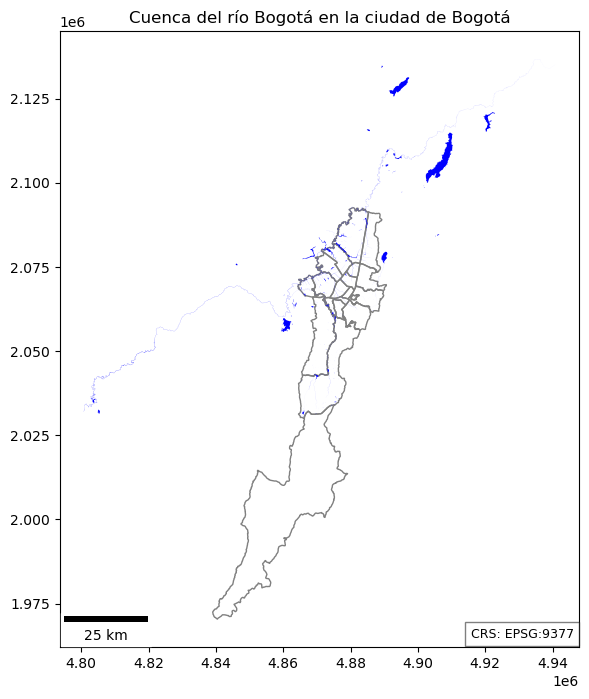

In [44]:
bogota_cuenca = c_agua[c_agua["CUENCA"] == "Río Bogotá"].copy() 
display(bogota_cuenca)

fig, ax = plt.subplots(figsize=(8, 8))
localidades.plot(ax=ax, color="none", edgecolor="grey")
bogota_cuenca.plot(ax=ax, color="blue", markersize=6)

plt.title("Cuenca del río Bogotá en la ciudad de Bogotá")

# Barra de escala
scalebar = ScaleBar(1, units="m", location='lower left')  # metros
ax.add_artist(scalebar)

# Texto con CRS
crs_texto = str(bogota_cuenca.crs)
ax.text(0.99, 0.01, f"CRS: {crs_texto}", transform=ax.transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))

# Guardar y mostrar
mapa2 = ruta_mapa + r"/mapa_cuenca_río_Bogotá.png"
plt.savefig(mapa2, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Sin embargo, es de interés solo los cuerpos de agua que pertenecen a la cuenca del río Bogotá. En la capa de cuerpos de agua hay una columna de CUENCA, la cual señala la cuenca a la cual pertenece cada cuerpo de agua, con base a esta información se procede a seleccionar o filtrar solo aquellas que hacen parte de la cuenca del río Bogotá.

Tal y como se hizo anteriormente, de igual forma se genera un mapa con los cuerpos de agua que pertenecen a la cuenca del río Bogotá.


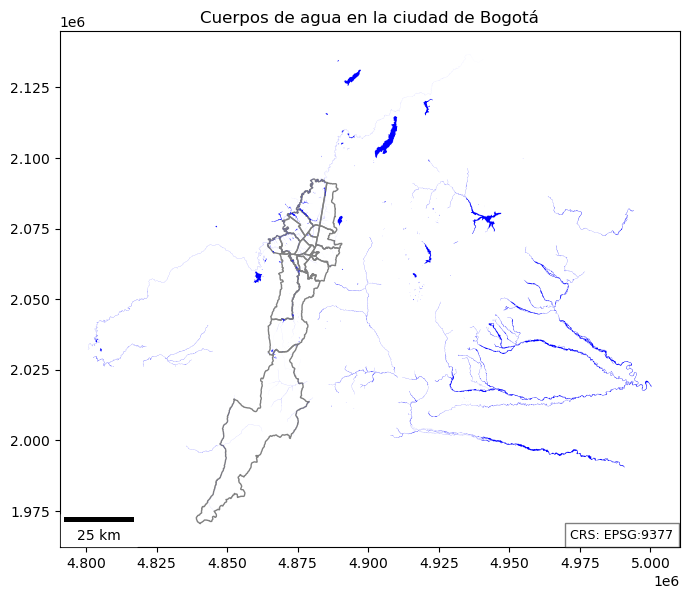

In [43]:
fig, ax = plt.subplots(figsize=(8, 8)) #se crea la figura del mapa de los cuerpos de agua que estan en Bogotá
localidades.plot(ax=ax, color="none", edgecolor="grey")
c_agua.plot(ax=ax, color="blue", markersize=6)

plt.title("Cuerpos de agua en la ciudad de Bogotá")


scalebar = ScaleBar(1, units="m", location='lower left')  # se genera la escala del mapa
ax.add_artist(scalebar)

crs_texto = str(c_agua.crs) #se pone en el mapa el CRS
ax.text(0.99, 0.01, f"CRS: {crs_texto}", transform=ax.transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))


mapa1 = ruta_mapa + r"/mapa_cuencas.png" #con base al ruta para guardar los mapas ya especificada anteriormente
                                         #se establece el nombre con el cual se va a guardar el mapa                       
plt.savefig(mapa1, dpi=300, bbox_inches='tight') #se guarda el mapa de acuerdo a las especificaciones anteriormente dadas
plt.show()
plt.close()

De acuerdo a una revisión inicial, se pudo determinar que la ronda hídrica de acuerdo a la normatividad colombiana puede ser de un ancho máximo de 30 m (ancho sujeto a modificaciones por razones especificas), con base a esta información y con el fin de poder identificar una posible área de afectación por inundaciones, se genera un buffer con ese ancho.

Tal y como se hizo anteriormente, de igual forma se genera un mapa con este buffer, que representaría una primera zona de afectación por posible riesgo de inundación por la cuenca del río Bogotá.


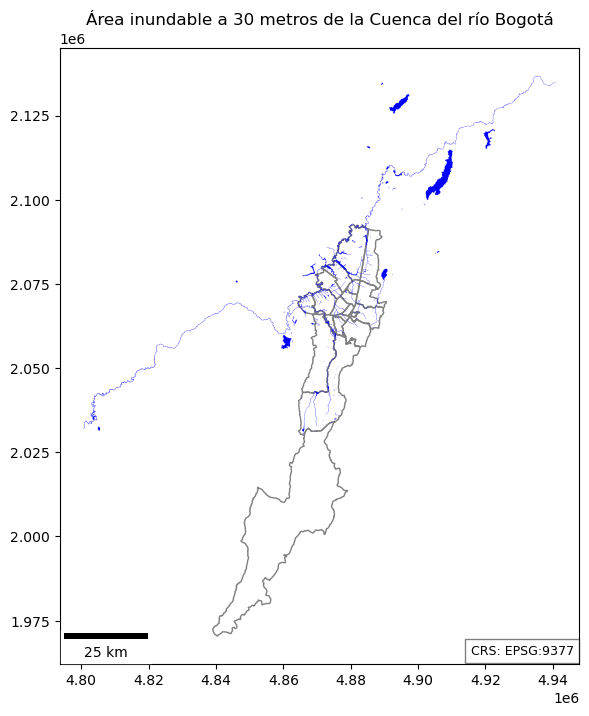

In [45]:
bta_buffer_30m = bogota_cuenca.geometry.buffer(30) #Se crea el buffer

fig, ax = plt.subplots(figsize=(8, 8))
localidades.plot(ax=ax, color="none", edgecolor="grey")
bta_buffer_30m.plot(ax=ax, color="blue", markersize=6)

plt.title("Área inundable a 30 metros de la Cuenca del río Bogotá")

# Barra de escala
scalebar = ScaleBar(1, units="m", location='lower left')  # metros
ax.add_artist(scalebar)

# Texto con CRS
crs_texto = str(bta_buffer_30m.crs)
ax.text(0.99, 0.01, f"CRS: {crs_texto}", transform=ax.transAxes,
        fontsize=9, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))

# Guardar y mostrar
mapa3 = ruta_mapa + r"/mapa_30m_cuenca_río_Bogotá.png"
plt.savefig(mapa3, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## Parte 2: Datos de población y de pobreza a nivel de manzana

In [2]:
# Directorios de trabajo
root=r"/wrk/data/"
outmap = r"/wrk/output/maps"
pobsh  = root+r"/raw/MGN_NivelManzana_Integrado_CNPV/MGN_ANM_MANZANA.shp"
vulsh  = root+r"raw/VULNRB_IPMxMZ/VULNRB_IPMxMZ.shp"

#### Data de población a nivel de manzana

In [3]:
# Cargar el shapefile
pob = gpd.read_file(pobsh)
pob.head()

,COD_DANE_A,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,CLAS_CCDGO,SETR_CCDGO,SETR_CCNCT,SECR_CCDGO,SECR_CCNCT,ZU_CCDGO,...,TP51POSTGR,TP51_13_ED,TP51_99_ED,CD_LC_CM,NMB_LC_CM,TP_LC_CM,Shape_Leng,Shape_Area,COD_RDTM,geometry
0,0500210000000000010101,05,002,05002,1,000,050021000,00,05002100000,000,...,0.0,10.0,1.0,None,None,None,0.002298,2.038760e-07,050021990000000000010101,"POLYGON ((-75.42779 5.79423, -75.4278 5.79422,..."
1,0500210000000000010102,05,002,05002,1,000,050021000,00,05002100000,000,...,0.0,19.0,4.0,None,None,None,0.003402,5.600867e-07,050021990000000000010102,"POLYGON ((-75.42719 5.79421, -75.42715 5.79415..."
2,0500210000000000010103,05,002,05002,1,000,050021000,00,05002100000,000,...,0.0,6.0,1.0,None,None,None,0.002622,4.293780e-07,050021990000000000010103,"POLYGON ((-75.42804 5.79294, -75.42807 5.79291..."
3,0500210000000000010104,05,002,05002,1,000,050021000,00,05002100000,000,...,0.0,11.0,2.0,None,None,None,0.002673,4.493171e-07,050021990000000000010104,"POLYGON ((-75.42853 5.79348, -75.4286 5.79342,..."
4,0500210000000000010105,05,002,05002,1,000,050021000,00,05002100000,000,...,0.0,0.0,0.0,None,None,None,0.001338,8.776894e-08,050021990000000000010105,"POLYGON ((-75.4291 5.79393, -75.4291 5.79393, ..."


In [4]:
# Dejar solo info para Bogotá-urbana y reproyectar a 9377
pob_bog = pob[(pob['MPIO_CDPMP'] == '11001')]
pob_bog = pob_bog[(pob_bog['CLAS_CCDGO'] == '1')]
pob_bog = pob_bog.to_crs('EPSG:9377') 
pob_bog.head()

,COD_DANE_A,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,CLAS_CCDGO,SETR_CCDGO,SETR_CCNCT,SECR_CCDGO,SECR_CCNCT,ZU_CCDGO,...,TP51POSTGR,TP51_13_ED,TP51_99_ED,CD_LC_CM,NMB_LC_CM,TP_LC_CM,Shape_Leng,Shape_Area,COD_RDTM,geometry
73532,1100110000000011010101,11,001,11001,1,000,110011000,00,11001100000,000,...,0.0,0.0,7.0,04,SAN CRISTOBAL,Localidad,0.004176,6.972582e-07,110011040000000011010101,"POLYGON ((4880030.651 2064741.271, 4880030.668..."
73533,1100110000000011010102,11,001,11001,1,000,110011000,00,11001100000,000,...,0.0,2.0,3.0,04,SAN CRISTOBAL,Localidad,0.005631,1.441212e-06,110011040000000011010102,"POLYGON ((4880144.24 2064800.487, 4880147.853 ..."
73534,1100110000000011010103,11,001,11001,1,000,110011000,00,11001100000,000,...,44.0,5.0,20.0,04,SAN CRISTOBAL,Localidad,0.011082,4.559626e-06,110011040000000011010103,"POLYGON ((4880283.067 2064569.668, 4880311.422..."
73535,1100110000000011010104,11,001,11001,1,000,110011000,00,11001100000,000,...,125.0,24.0,37.0,04,SAN CRISTOBAL,Localidad,0.008378,2.816703e-06,110011040000000011010104,"POLYGON ((4880011.303 2064647.161, 4880009.885..."
73536,1100110000000011010105,11,001,11001,1,000,110011000,00,11001100000,000,...,0.0,9.0,2.0,04,SAN CRISTOBAL,Localidad,0.002777,4.651488e-07,110011040000000011010105,"POLYGON ((4880316.284 2064519.711, 4880337.676..."


In [5]:
# Generar variable de densidad poblacional 
#pob_bog['area_km2'] = pob_bog.geometry.area/1_000_000
pob_bog['area_m2'] = pob_bog.geometry.area
pob_bog['denspop']  = pob_bog['TP27_PERSO']/pob_bog['area_m2'] 

In [19]:
print(pob_bog.columns.tolist())

['COD_DANE_A', 'DPTO_CCDGO', 'MPIO_CCDGO', 'MPIO_CDPMP', 'CLAS_CCDGO', 'SETR_CCDGO', 'SETR_CCNCT', 'SECR_CCDGO', 'SECR_CCNCT', 'ZU_CCDGO', 'ZU_CDIVI', 'SETU_CCDGO', 'SETU_CCNCT', 'SECU_CCDGO', 'SECU_CCNCT', 'MANZ_CCDGO', 'AG_CCDGO', 'DATO_ANM', 'VERSION', 'AREA', 'LATITUD', 'LONGITUD', 'DENSIDAD', 'CTNENCUEST', 'TP3_1_SI', 'TP3_2_NO', 'TP3A_RI', 'TP3B_TCN', 'TP4_1_SI', 'TP4_2_NO', 'TP9_1_USO', 'TP9_2_USO', 'TP9_3_USO', 'TP9_4_USO', 'TP9_2_1_MI', 'TP9_2_2_MI', 'TP9_2_3_MI', 'TP9_2_4_MI', 'TP9_2_9_MI', 'TP9_3_1_NO', 'TP9_3_2_NO', 'TP9_3_3_NO', 'TP9_3_4_NO', 'TP9_3_5_NO', 'TP9_3_6_NO', 'TP9_3_7_NO', 'TP9_3_8_NO', 'TP9_3_9_NO', 'TP9_3_10_N', 'TP9_3_99_N', 'TVIVIENDA', 'TP14_1_TIP', 'TP14_2_TIP', 'TP14_3_TIP', 'TP14_4_TIP', 'TP14_5_TIP', 'TP14_6_TIP', 'TP15_1_OCU', 'TP15_2_OCU', 'TP15_3_OCU', 'TP15_4_OCU', 'TP16_HOG', 'TP19_EE_1', 'TP19_EE_2', 'TP19_EE_E1', 'TP19_EE_E2', 'TP19_EE_E3', 'TP19_EE_E4', 'TP19_EE_E5', 'TP19_EE_E6', 'TP19_EE_E9', 'TP19_ACU_1', 'TP19_ACU_2', 'TP19_ALC_1', 'TP19_ALC

In [23]:
#Definir el ID
pob_bog[['SECU_CCDGO', 'SECU_CCNCT','MANZ_CCDGO', 'AG_CCDGO', 'DATO_ANM']].head()

,SECU_CCDGO,SECU_CCNCT,MANZ_CCDGO,AG_CCDGO,DATO_ANM
73532,01,11001100000000110101,01,162540,MANZANA
73533,01,11001100000000110101,02,162648,MANZANA
73534,01,11001100000000110101,03,163041,MANZANA
73535,01,11001100000000110101,04,162961,MANZANA
73536,01,11001100000000110101,05,163220,MANZANA


In [28]:
# Dejar una sola variable ID de manzana para la información de población 
pob_bog["MNZ_ID"] = pob_bog["SECU_CCNCT"] + pob_bog["MANZ_CCDGO"]
pob_bog[["MNZ_ID"]].head()

,MNZ_ID
73532,1100110000000011010101
73533,1100110000000011010102
73534,1100110000000011010103
73535,1100110000000011010104
73536,1100110000000011010105


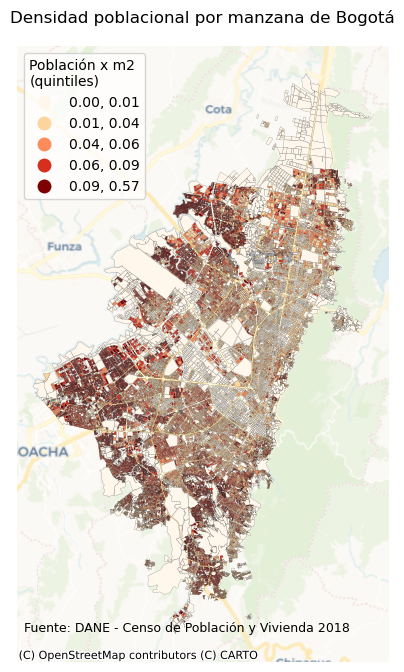

In [6]:
# Mapa de población por manzana de Bogotá 
fig, ax = plt.subplots(figsize=(8, 8))
pob_bog.plot(
    column="denspop",
    scheme="Quantiles",  
    k=5,
    cmap="OrRd",
    edgecolor="black",
    linewidth=0.09,
    legend=True,
     legend_kwds={
        "loc": "upper left",
        "title": "Población x m2 \n(quintiles)"
    },
    ax=ax
)  
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs=9377, alpha=0.8)  # Basemap reprojected to EPSG: 9377
ax.set_title("Densidad poblacional por manzana de Bogotá")
ax.annotate("Fuente: DANE - Censo de Población y Vivienda 2018", xy=(0.02, 0.05), xycoords="axes fraction", fontsize=9,)
ax.set_axis_off()
plt.show()  # Top 20 producers are primarily located in Santander and Norte de Santander, Arauca, Nariño
fig.savefig(outmap + r"/poblacion_manzanas_BOG.png", dpi=300, bbox_inches='tight')

#### Data de vulnerabilidad socioeconómica por manzana

In [7]:
# Cargar el shapefile de vulnerabilidad por manzana, con el índice de pobreza multidimensional que mide el porcentaje de hogares en 
ipm = gpd.read_file(vulsh)
ipm.head()

,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,reactivaci,geometry
0,05,05001,0500110000000001010101,5.0,Vulnerabilidad baja,39.4,Vulnerabilidad media-alta,elegibilidad media-baja,"POLYGON ((-75.54267 6.30182, -75.54262 6.30175..."
1,05,05001,0500110000000001010104,5.0,Vulnerabilidad baja,25.9,Vulnerabilidad media-alta,elegibilidad media,"POLYGON ((-75.54237 6.29968, -75.54235 6.29965..."
2,05,05001,0500110000000001010105,2.0,Vulnerabilidad media-baja,14.1,Vulnerabilidad media-baja,elegibilidad media,"POLYGON ((-75.5428 6.29964, -75.54277 6.29959,..."
3,05,05001,0500110000000001010108,2.0,Vulnerabilidad media-baja,26.8,Vulnerabilidad media-baja,elegibilidad media,"POLYGON ((-75.54386 6.29974, -75.54386 6.29975..."
4,05,05001,0500110000000001010110,5.0,Vulnerabilidad baja,42.2,Vulnerabilidad baja,elegibilidad media-baja,"POLYGON ((-75.54369 6.30214, -75.54369 6.30213..."


In [9]:
# Dejar solo info para Bogotá y reproyectar a 9377
ipm_bog = ipm[(ipm['COD_MPIO'] == '11001')]
ipm_bog = ipm_bog.to_crs('EPSG:9377') 
ipm_bog.head()

,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,reactivaci,geometry
73300,11,11001,1100110000000011010101,2.0,Vulnerabilidad baja,23.1,Vulnerabilidad media-baja,elegibilidad media,"POLYGON ((4880030.651 2064741.271, 4880030.668..."
73301,11,11001,1100110000000011010102,5.0,Vulnerabilidad media,20.8,Vulnerabilidad media-baja,elegibilidad media,"POLYGON ((4880144.24 2064800.487, 4880147.853 ..."
73302,11,11001,1100110000000011010103,3.0,Vulnerabilidad media-baja,9.7,Vulnerabilidad baja,elegibilidad media,"POLYGON ((4880283.067 2064569.668, 4880311.422..."
73303,11,11001,1100110000000011010104,4.0,Vulnerabilidad media-alta,5.6,Vulnerabilidad media-baja,elegibilidad media,"POLYGON ((4880011.303 2064647.161, 4880009.885..."
73304,11,11001,1100110000000011010105,3.0,Vulnerabilidad media-baja,19.6,Vulnerabilidad media,elegibilidad media,"POLYGON ((4880316.284 2064519.711, 4880337.676..."


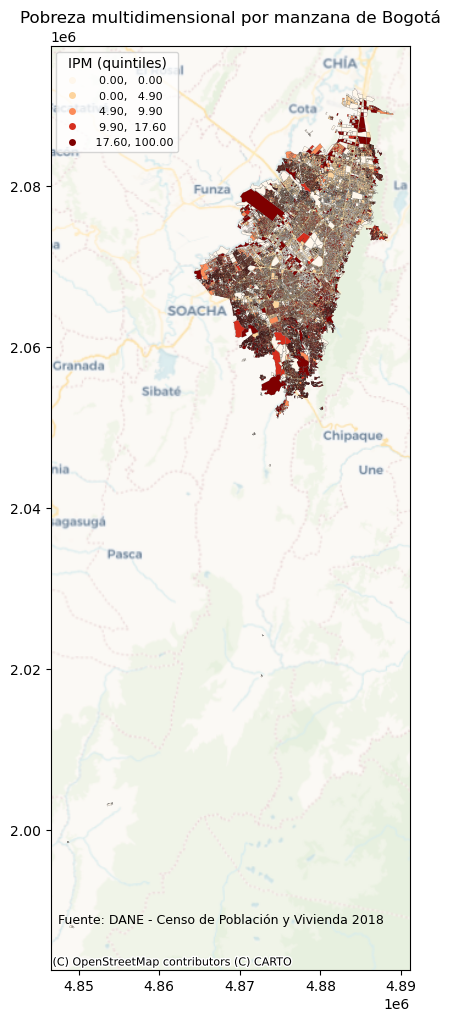

In [10]:
# Mapa de población por manzana de Bogotá 
fig, ax = plt.subplots(figsize=(6, 12))
ipm_bog.plot(
    column="ipm",
    scheme="Quantiles",  
    k=5,
    cmap="OrRd",
    edgecolor="black",
    linewidth=0.09,
    legend=True,
     legend_kwds={
        "loc": "upper left",
        "title": "IPM (quintiles)",
        "fontsize": 8, 
        "title_fontsize": 10,
        "markerscale": 0.5          # reduce el tamaño de los símbolos
    },
    ax=ax
)  
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs=9377, alpha=0.8)  # Basemap reprojected to EPSG: 9377
ax.set_title("Pobreza multidimensional por manzana de Bogotá")
ax.annotate("Fuente: DANE - Censo de Población y Vivienda 2018", xy=(0.02, 0.05), xycoords="axes fraction", fontsize=9,)
plt.show()  # Top 20 producers are primarily located in Santander and Norte de Santander, Arauca, Nariño
fig.savefig(outmap + r"/ipm_manzanas_BOG.png", dpi=300, bbox_inches='tight')

## Join población por manzana con IPM

In [29]:
popvul = pob_bog.merge(
    ipm_bog,
    left_on='MNZ_ID',
    right_on='COD_DANE',
    how='left',
    indicator=True           
)
popvul['_merge'].value_counts()

_merge
both          43331
left_only         0
right_only        0
Name: count, dtype: int64

In [15]:
popvul.head()

,COD_DANE_A,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,CLAS_CCDGO,SETR_CCDGO,SETR_CCNCT,SECR_CCDGO,SECR_CCNCT,ZU_CCDGO,...,denspop,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,reactivaci,geometry_y
0,1100110000000011010101,11,001,11001,1,000,110011000,00,11001100000,000,...,0.001521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,1100110000000011010102,11,001,11001,1,000,110011000,00,11001100000,000,...,0.025024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,1100110000000011010103,11,001,11001,1,000,110011000,00,11001100000,000,...,0.014084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,1100110000000011010104,11,001,11001,1,000,110011000,00,11001100000,000,...,0.072740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,1100110000000011010105,11,001,11001,1,000,110011000,00,11001100000,000,...,0.039294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [31]:
print(popvul.columns.tolist())

['COD_DANE_A', 'DPTO_CCDGO', 'MPIO_CCDGO', 'MPIO_CDPMP', 'CLAS_CCDGO', 'SETR_CCDGO', 'SETR_CCNCT', 'SECR_CCDGO', 'SECR_CCNCT', 'ZU_CCDGO', 'ZU_CDIVI', 'SETU_CCDGO', 'SETU_CCNCT', 'SECU_CCDGO', 'SECU_CCNCT', 'MANZ_CCDGO', 'AG_CCDGO', 'DATO_ANM', 'VERSION', 'AREA', 'LATITUD', 'LONGITUD', 'DENSIDAD', 'CTNENCUEST', 'TP3_1_SI', 'TP3_2_NO', 'TP3A_RI', 'TP3B_TCN', 'TP4_1_SI', 'TP4_2_NO', 'TP9_1_USO', 'TP9_2_USO', 'TP9_3_USO', 'TP9_4_USO', 'TP9_2_1_MI', 'TP9_2_2_MI', 'TP9_2_3_MI', 'TP9_2_4_MI', 'TP9_2_9_MI', 'TP9_3_1_NO', 'TP9_3_2_NO', 'TP9_3_3_NO', 'TP9_3_4_NO', 'TP9_3_5_NO', 'TP9_3_6_NO', 'TP9_3_7_NO', 'TP9_3_8_NO', 'TP9_3_9_NO', 'TP9_3_10_N', 'TP9_3_99_N', 'TVIVIENDA', 'TP14_1_TIP', 'TP14_2_TIP', 'TP14_3_TIP', 'TP14_4_TIP', 'TP14_5_TIP', 'TP14_6_TIP', 'TP15_1_OCU', 'TP15_2_OCU', 'TP15_3_OCU', 'TP15_4_OCU', 'TP16_HOG', 'TP19_EE_1', 'TP19_EE_2', 'TP19_EE_E1', 'TP19_EE_E2', 'TP19_EE_E3', 'TP19_EE_E4', 'TP19_EE_E5', 'TP19_EE_E6', 'TP19_EE_E9', 'TP19_ACU_1', 'TP19_ACU_2', 'TP19_ALC_1', 'TP19_ALC